In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 21 09:59:40 2017

@author: tang
"""
import math
import matplotlib.pyplot as plt
import numpy as np

Initialize parameters

In [20]:
user_num = 943       #用户数
item_num = 1682      #项目数
max_iteration = 60   #最大迭代次数
eta = 0.001          #学习率
lbda = 0.01          #惩罚因子
k = 6                #潜在特征数

Read Data

In [15]:
def readData(datafile):
    R = np.zeros((user_num, item_num))
    for line in open(datafile):
        userid, itemid, record, _ = line.split('\t')
        (userid, itemid, record) = map(int,(userid, itemid, record))
        R[userid - 1][itemid - 1] = float(record)
    return R

#### Matrix Factorization's L2 loss function:

$$E^2_{i,j}=\left(r_{i,j} - \sum_{k = 1}^K {p_{i,k}}{q_{k,j}}\right)^2 + \frac{\lambda}{2} \sum_{k = 1}^K \left( p^2_{i,k} + q^2_{k,j}\right)$$
#### Update p and q:
$$e_{i,j} = r_{i,j} - \sum_{k = 1}^K {p_{i,k}}{q_{k,j}}$$
$$p_{i,k} = p_{i,k} - \eta\left(-2e_{i,j}q_{k,j} + \lambda p_{i,k}\right)$$
$$q_{k,j} = q_{k,j} - \eta\left(-2e_{i,j}p_{i,k} + \lambda q_{k,j}\right)$$

In [16]:
def mfrs():    
    P = np.random.rand(user_num, k)
    Q = np.random.rand(item_num, k)
    train_loss = []
    val_loss = []
    for iter in range(max_iteration):
        loss_train = []
        loss_val = []
        for i in range(user_num):
            for j in range(item_num):
                if math.fabs(train_data[i][j]) > 1e-4:
                    error = train_data[i][j] - np.dot(P[i], Q[j])
                    #print(error)
                    reg_train = 0
                    for tk in range(k):
                        reg_train += P[i][tk] ** 2 + Q[j][tk] ** 2 
                    loss_train.append(error ** 2 + lbda / 2 * reg_train)
                    
                    # compute gradient
                    for t in range(k):
                        p_grad = -2 * error * Q[j][t] + lbda * P[i][t]
                        q_grad = -2 * error * P[i][t] + lbda * Q[j][t]
                        P[i][t] -= eta * p_grad
                        Q[j][t] -= eta * q_grad
                        
                if math.fabs(val_data[i][j]) > 1e-4:
                    error_val_data = val_data[i][j] - np.dot(P[i], Q[j])
                    reg_val = 0
                    for tk in range(k):
                        reg_val += P[i][tk] ** 2 + Q[j][tk] ** 2 
                    loss_val.append(error_val_data ** 2 + lbda / 2 * reg_val)
                    
        train_loss.append(np.mean(loss_train))
        val_loss.append(np.mean(loss_val))
    return train_loss, val_loss

Load and read dataset

In [17]:
train_data_path = './u1.base'
train_data = readData(train_data_path)
val_data_path = './u1.test'
val_data = readData(val_data_path)

Compute loss

In [21]:
trainloss, valloss = mfrs()
print(trainloss[len(trainloss)-1])
print(valloss[len(valloss)-1])

0.965673056185
1.09114890131


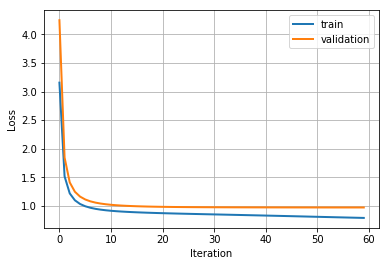

In [19]:
fig, ax = plt.subplots()
ax.plot(trainloss, label='train', linewidth=2.0)
ax.plot(valloss, label='validation', linewidth=2.0)
ax.set(xlabel='Iteration', ylabel='Loss')
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()